In [1]:
import wandb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Initialize wandb API
api = wandb.Api()

In [3]:
runs = [('fielding-lab/clip-stats/85jv6h26','RN50'), ('fielding-lab/clip-stats/vaa0rtx0', 'ViT-B-16'), ('fielding-lab/obb-stats/02vhjcaa', '960'), ('fielding-lab/obb-stats/8bdstwot', '1280')]
history = {}
summary = {}
for r, label in runs:
    # Retrieve a specific run
    run = api.run(r)
    # Get the history (logged metrics)
    history[label] = run.history()
    history[label]['Timestamp'] -= history[label]['Timestamp'][0]
    summary[label] = run.summary

In [9]:
new_labels = ['CLIP_RN50', 'CLIP_ViT-B-16', 'OBB_960', 'OBB_1280']

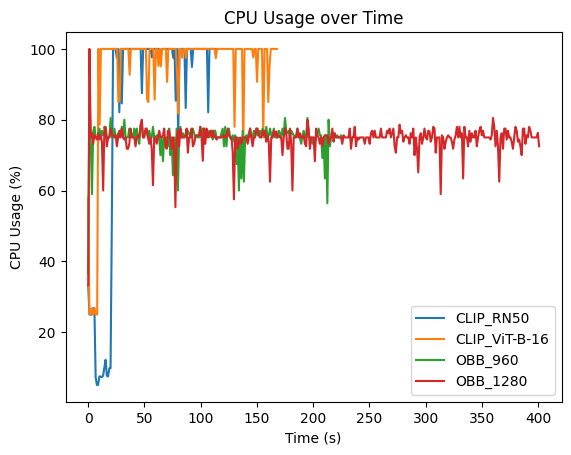

In [19]:
# Plot CPU Usage
i = 0
for r, label in runs:
    plt.plot(history[label]['Timestamp'][:-6], history[label]['CPU Usage (%)'][:-6], label=new_labels[i])
    i += 1
plt.xlabel('Time (s)')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage over Time')
plt.legend()
plt.show()

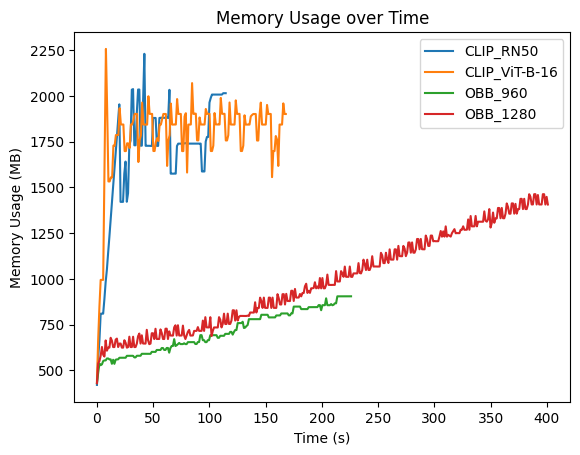

In [20]:
# Plot CPU Usage
i = 0
for r, label in runs:
    plt.plot(history[label]['Timestamp'][:-6], history[label]['Memory Usage (MB)'][:-6], label=new_labels[i])
    i += 1
plt.xlabel('Time (s)')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage over Time')
plt.legend()
plt.show()

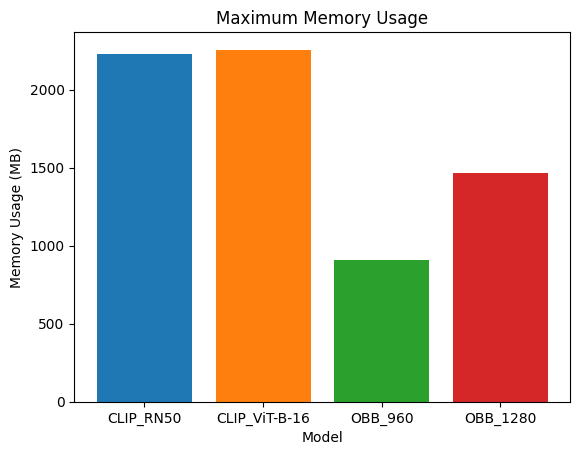

In [21]:
i = 0
for r, label in runs:
    plt.bar(new_labels[i], history[label]['Memory Usage (MB)'].max())
    i += 1
plt.xlabel('Model')
plt.ylabel('Memory Usage (MB)')
plt.title('Maximum Memory Usage')
plt.show()

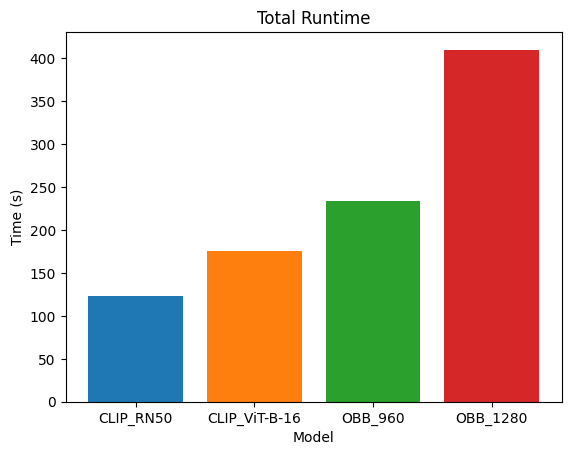

In [22]:
i = 0
for r, label in runs:
    plt.bar(new_labels[i], summary[label]['_runtime'])
    i += 1
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.title('Total Runtime')
plt.show()

In [28]:
print('RN50: ', summary['RN50']['avg_proc_time'])
print('ViT-B-16: ', summary['ViT-B-16']['avg_proc_time'])
print('960: ', summary['960']['avg_preprocess'])
print('1280: ', summary['1280']['avg_preprocess'])

RN50:  0.9636027574539184
ViT-B-16:  1.6116692066192626
960:  2.4762056599492612
1280:  4.381578010061513


In [33]:
print('RN50: ', summary['RN50']['sim_time'])
print('ViT-B-16: ', summary['ViT-B-16']['sim_time'])
print('960: ', summary['960']['calc_simularity_time'])
print('1280: ', summary['1280']['calc_simularity_time'])

RN50:  0.0026907920837402344
ViT-B-16:  0.0005977153778076172
960:  0.28783583641052246
1280:  0.2826817035675049
